# Business Understanding

Here is the business overview for the notebook 

 

The business problem we were presented with was that Computing Vision is interested in entering the film making industry but lacks industry knowledge and is looking for recommendations. We have come up with solutions to provide the what, the how and the who to provide Computing Visions with the necessary tools to make a successful entrance into the film making industry.

We first need to import all of the necessary libraries in order to be able to perform our work and do our ERDs.

In [1]:
import sqlite3 #importing SQL
import pandas as pd #importing Pandas
import numpy as np #importing numpy
from scipy import stats #importing Scipy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
from pandasql import sqldf #to querry databases directly with SQL syntax
%matplotlib inline

Next we import and view our data

In [2]:
gross_df= pd.read_csv("data/bom.movie_gross.csv.gz") #importing bom.movie_gross.csv.gz

In [3]:

gross_df #viewing our csv file 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We repeat this process for both our CSV and TSV files

In [4]:
budgets_df= pd.read_csv("data/tn.movie_budgets.csv.gz")

In [5]:
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
movies_df= pd.read_csv("data/tmdb.movies.csv.gz")

In [7]:
movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
df_info = pd.read_csv("data/rt.movie_info.tsv.gz", sep='\t')

In [9]:
df_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
df_reviews = pd.read_csv("data/rt.reviews.tsv.gz", sep='\t', engine = 'python')

In [11]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


The next step is to connect and load our database

In [12]:
conn = sqlite3.connect('data/im.db')  #connecting our database

In [13]:
df = pd.read_sql("""SELECT * FROM sqlite_master;""", conn) #loading the master 
df.head() # viewing the master 

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [14]:
basics_df = pd.read_sql("""SELECT DISTINCT * FROM movie_basics;""", conn)
basics_df.info() #loads basics table into dataframe and displays info
basics_df.head() # displays top 5 values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn) #loads rating table in a dataframe  
ratings_df.head() #displays rating table 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The first thing we needed to know was what made a movie successful. Our metric for measuring a movies overall success was rating. A movie with a high rating or a rating of 8 and above was considered to be a successful and a movie with a low rating a movie with a rating of 3 or less was considered unsuccessful. 

# Joining Tables
We then need to join the necessary tables in our case it would be our KPI which is on the rating table and what we are evaluating the genre. We also noticed that before joining the tables the ratings table that the basics tables had more rows and that rating had significantly less row, however, there were no null values in ratings so when joining them we are going to assume that in the basics table had movies with no ratings.

In [17]:
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8 AND numvotes >1000 --we are making any movie above 8 a good movie and are only considering movies with over 1000 votes to normalize our data
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn) # we joined the tables basics and rating and looked at selected the the rows with an averagerating value of 8 and above

In [18]:
joined_tables_df.head(25) #viewed the top 25 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,"Crime,Mystery,Thriller",9.3,18470
2,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568
3,tt4733046,The Weight of Chains 2,The Weight of Chains 2,2014,124.0,"Comedy,Documentary,History",9.2,1015
4,tt2592910,CM101MMXI Fundamentals,CM101MMXI Fundamentals,2013,139.0,"Comedy,Documentary",9.2,41560
5,tt8160864,Chase,Chase,2019,84.0,Thriller,8.9,1656
6,tt10312668,Tell No One,Tylko nie mów nikomu,2019,121.0,Documentary,8.9,2111
7,tt4519488,Mudras Calling,Mudras Calling,2018,95.0,"Adventure,Drama,Romance",8.9,1179
8,tt1754109,Les Misérables in Concert: The 25th Anniversary,Les Misérables in Concert: The 25th Anniversary,2010,178.0,"Drama,Music,Musical",8.8,4583
9,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067


# Genre
We first needed to investigate genre as it is often the first categorization a consumer does when choosing a movie. Do they want to watch a comedy an action or even a horror film. We also know that  A film genre will also  affect the film making techniques and styles that are used on set and by directors. We know that we would be producing a movie but what kind of movie are we producing. We noticed that there were a multituded of genres due to the way the string values were attached and that we would not be able to perform operation on those values without first seperating them.

In [19]:
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") # split the genres and added a space in order to use the ex

In [20]:
genres_split_df=joined_tables_df.explode('genres') # used explode fucntion to seperate movies based on genres

We now have a new dataframe with each individual genre



In [21]:

genres_split_df # the seperation was loaded into this dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509
0,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,History,9.5,6509
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Crime,9.3,18470
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Mystery,9.3,18470
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Thriller,9.3,18470
...,...,...,...,...,...,...,...,...
142,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193
142,tt1663202,The Revenant,The Revenant,2015,156.0,Biography,8.0,621193
143,tt2375379,One Piece Film Z,One Piece Film Z,2012,108.0,Action,8.0,4967
143,tt2375379,One Piece Film Z,One Piece Film Z,2012,108.0,Adventure,8.0,4967


In [22]:
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts

Drama          71
Documentary    37
Comedy         32
Action         28
Biography      25
Thriller       24
Crime          20
Adventure      19
History        16
Romance        14
Mystery        13
Animation      12
Family         10
Fantasy        10
Sport           9
Music           8
Sci-Fi          8
War             8
Horror          5
Musical         4
News            4
Western         1
Name: genres, dtype: int64

In [23]:
genre_keys=genres_split_df['genres'].value_counts().keys() #this loads the keys of the series into a valuable 

In [24]:

genre_values=genres_split_df['genres'].value_counts().values #this loads the values into a variable

In [25]:
genre_values

array([71, 37, 32, 28, 25, 24, 20, 19, 16, 14, 13, 12, 10, 10,  9,  8,  8,
        8,  5,  4,  4,  1], dtype=int64)

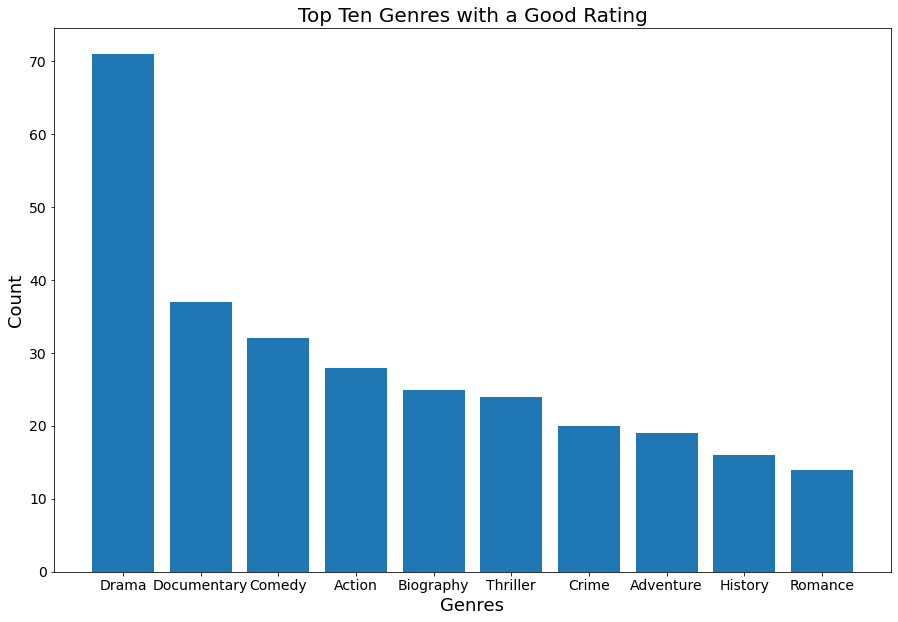

In [26]:
fig, ax = plt.subplots(figsize= (15,10) )
ax.bar(genre_keys[:10],genre_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres with a Good Rating', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('Count',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=14)
ax.tick_params(axis='y', which='both', labelsize=14)

#plots the top ten genres with a a rating above it based on the number of movies

The bar graph above shows the genre with the most amount of successful movies. 

Text(0.5, 1.0, 'Percentages by Genre')

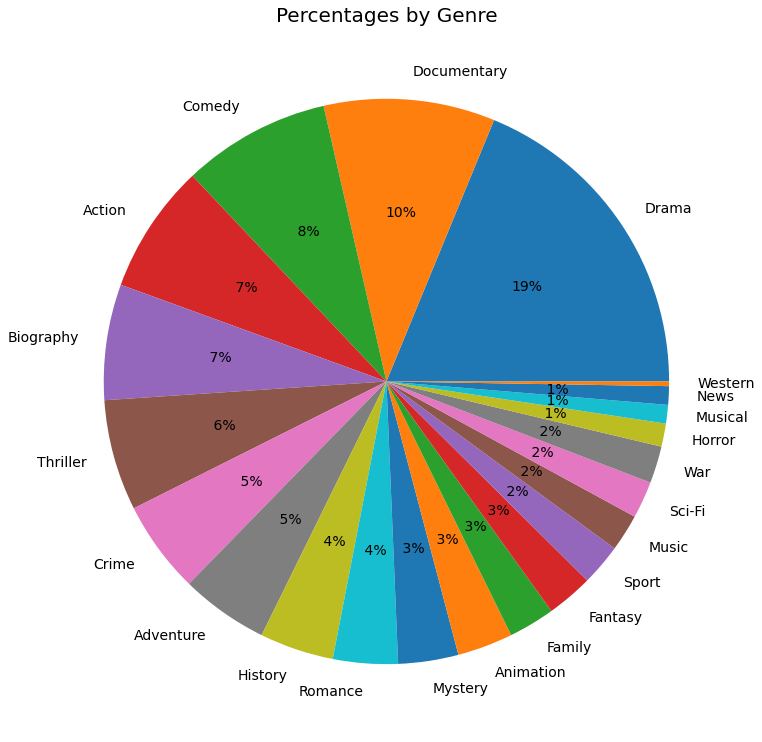

In [27]:
fig, ax = plt.subplots(figsize= (13,13) )
ax.pie(genre_values, labels=genre_keys,autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',textprops={'fontsize': 14}) #creates pie chart with the different genres
ax.tick_params(axis='x', which='both', labelsize=25)
ax.set_title('Percentages by Genre', fontsize= 20)
#plots a graph based on the percentage of movies produced by genre

According to our research we noticed that drama, documentary, and comedies have by our standard the most successful movies. We must however account for the fact that there could have been more movies of those genres produced. And this is what our pie chart shows that more movies of those genres were produced. Is that in indicator that those genres have a higher chance at being successful and its something that our other competing movie studios know as well or is there more to the data. To answer that question, we needed to dig further.

We repeat the joining process again but this time we are looking at all movies not just those with a rating higher than 8.

In [28]:
jt_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes>1000
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [29]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt4733046,The Weight of Chains 2,The Weight of Chains 2,2014,124.0,"Comedy,Documentary,History",9.2,1015
1,tt8160864,Chase,Chase,2019,84.0,Thriller,8.9,1656
2,tt1754109,Les Misérables in Concert: The 25th Anniversary,Les Misérables in Concert: The 25th Anniversary,2010,178.0,"Drama,Music,Musical",8.8,4583
3,tt3592030,Mystery: Born to Rock,Mystery: Born to Rock,2014,85.0,Musical,8.6,1326
4,tt3917908,An Insignificant Man,An Insignificant Man,2016,96.0,"Documentary,Thriller",8.6,1583
...,...,...,...,...,...,...,...,...
482,tt1918886,Joker,Joker,2012,104.0,"Comedy,Family,Sci-Fi",2.6,4552
483,tt9562694,Alien Warfare,Alien Warfare,2019,88.0,"Action,Sci-Fi",2.6,1509
484,tt2814362,United Passions,United Passions,2014,110.0,"Drama,History,Sport",2.1,3878
485,tt2495980,It's a Fairy!,É Fada!,2016,86.0,"Comedy,Family,Fantasy",1.7,2541


In [30]:
jt_df['averagerating'].corr(jt_df['numvotes']) #to make sure there is no correlation between the number of votes and the rating shows a very weak correlation

0.1500989715345734

In [31]:
jt_df['genres'] = jt_df['genres'].str.split(",")  #split the genres to use explode function 

In [32]:
jt_df=jt_df.explode('genres') #seperated genres into different rows

In [33]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt4733046,The Weight of Chains 2,The Weight of Chains 2,2014,124.0,Comedy,9.2,1015
0,tt4733046,The Weight of Chains 2,The Weight of Chains 2,2014,124.0,Documentary,9.2,1015
0,tt4733046,The Weight of Chains 2,The Weight of Chains 2,2014,124.0,History,9.2,1015
1,tt8160864,Chase,Chase,2019,84.0,Thriller,8.9,1656
2,tt1754109,Les Misérables in Concert: The 25th Anniversary,Les Misérables in Concert: The 25th Anniversary,2010,178.0,Drama,8.8,4583
...,...,...,...,...,...,...,...,...
485,tt2495980,It's a Fairy!,É Fada!,2016,86.0,Comedy,1.7,2541
485,tt2495980,It's a Fairy!,É Fada!,2016,86.0,Family,1.7,2541
485,tt2495980,It's a Fairy!,É Fada!,2016,86.0,Fantasy,1.7,2541
486,tt4458206,Code Name: K.O.Z.,Kod Adi K.O.Z.,2015,114.0,Crime,1.5,26723


In [34]:
avg_rating_genres=jt_df.groupby('genres')['averagerating'].mean().round(2) #rounding to two decimal values

In [35]:
sorted_avg_genres=avg_rating_genres.sort_values(ascending=False) #this sorts the values by highest rating


In [36]:
sorted_avg_genres

genres
News           8.12
Documentary    7.41
Animation      6.87
Biography      6.86
Sport          6.75
Music          6.74
History        6.70
War            6.68
Drama          6.54
Musical        6.49
Crime          6.34
Romance        6.27
Thriller       6.26
Adventure      6.26
Mystery        6.26
Action         6.11
Family         6.08
Fantasy        6.02
Comedy         6.02
Western        6.00
Sci-Fi         5.76
Game-Show      5.60
Horror         5.52
Name: averagerating, dtype: float64

In [37]:
value_counts_for_genres=jt_df['genres'].value_counts() # looking at the insights for the genres

In [38]:

value_counts_for_genres

Drama          165
Comedy         119
Action         104
Thriller        79
Adventure       78
Horror          68
Documentary     66
Crime           66
Sci-Fi          60
Fantasy         60
Mystery         59
Romance         58
Animation       51
Biography       51
History         48
Family          46
Music           36
War             26
Musical         25
Sport           24
Western         22
News             4
Game-Show        1
Name: genres, dtype: int64

In our analysis we noticed that even though some genres were highly rated there were not enough of them to have a definitive decision as they could have been outliers therefore we are droping genres with less than 50 samples.

In [39]:
cleaned_genres=value_counts_for_genres.where(lambda x: x >25).dropna() #dropped values lower than 25

In [40]:
cleaned_genres #have the genres with more than 50 samples

Drama          165.0
Comedy         119.0
Action         104.0
Thriller        79.0
Adventure       78.0
Horror          68.0
Documentary     66.0
Crime           66.0
Sci-Fi          60.0
Fantasy         60.0
Mystery         59.0
Romance         58.0
Animation       51.0
Biography       51.0
History         48.0
Family          46.0
Music           36.0
War             26.0
Name: genres, dtype: float64

In [41]:
a=sorted_avg_genres.drop('Sport')
b= a.drop('Western')
c= b.drop('Musical')
d=c.drop('Game-Show')
cleaned=d.drop('News') #droping the values form the average genre

In [42]:
cleaned

genres
Documentary    7.41
Animation      6.87
Biography      6.86
Music          6.74
History        6.70
War            6.68
Drama          6.54
Crime          6.34
Romance        6.27
Thriller       6.26
Adventure      6.26
Mystery        6.26
Action         6.11
Family         6.08
Fantasy        6.02
Comedy         6.02
Sci-Fi         5.76
Horror         5.52
Name: averagerating, dtype: float64

In [43]:
avg_keys=cleaned.keys()
avg_keys
avg_values=cleaned.values
avg_values

array([7.41, 6.87, 6.86, 6.74, 6.7 , 6.68, 6.54, 6.34, 6.27, 6.26, 6.26,
       6.26, 6.11, 6.08, 6.02, 6.02, 5.76, 5.52])

In [44]:
y = avg_values[:10]

C:\Users\rompalme\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-45-51c3c2d929bf>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))


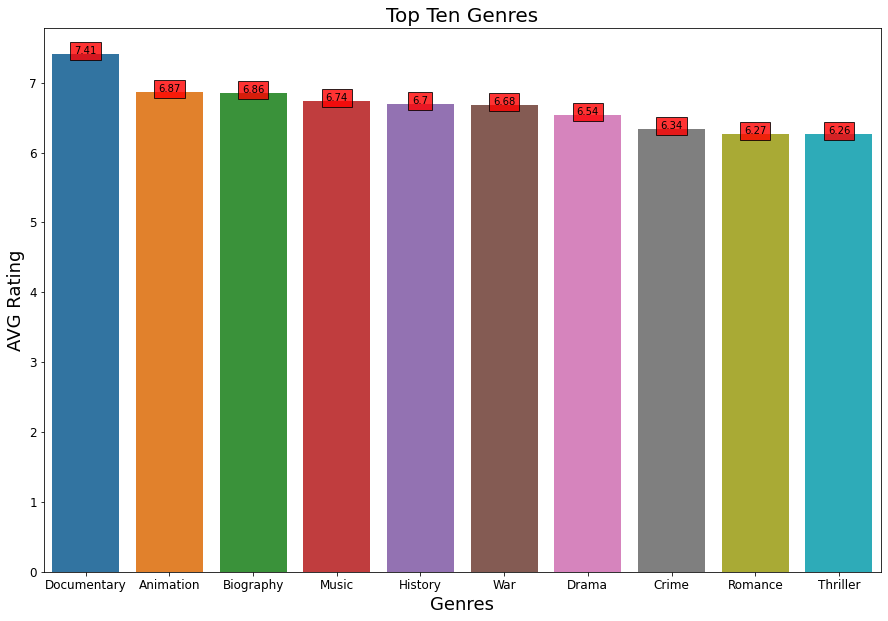

In [45]:
fig, ax = plt.subplots(figsize= (15,10) )
sns.barplot(avg_keys[:10],avg_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('AVG Rating',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='both', labelsize=12)

for i in range(len(avg_keys[:10])):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))

Once we plot our data we notice that documentaries has the highest average rating among all the genres and it also had the second genre with the most movies we'd recommend.

# Hypothesis Testing

Does the Documentary genre represent the entire population of genres?

In [46]:
# Ha : the Documentary genre has higher average ratings than the rest of the population
# Ho : the Documentary genre has the same or less average ratings compared to the rest of the population 

Our alpha will be alpha: .05 with a 95% confidence level

# Z test

In [47]:
jt_df['averagerating']

0      9.2
0      9.2
0      9.2
1      8.9
2      8.8
      ... 
485    1.7
485    1.7
485    1.7
486    1.5
486    1.5
Name: averagerating, Length: 1317, dtype: float64

In [48]:
mu=jt_df['averagerating'].mean() #average mean of the overall population 
mu

6.345178435839029

In [49]:
sigma=jt_df['averagerating'].std() #the standard deviation of the population 
sigma

1.2179576691289205

In [50]:
x_bar= sorted_avg_genres[1] #our sample mean 
x_bar

7.41

In [51]:
value_counts_for_genres

Drama          165
Comedy         119
Action         104
Thriller        79
Adventure       78
Horror          68
Documentary     66
Crime           66
Sci-Fi          60
Fantasy         60
Mystery         59
Romance         58
Animation       51
Biography       51
History         48
Family          46
Music           36
War             26
Musical         25
Sport           24
Western         22
News             4
Game-Show        1
Name: genres, dtype: int64

In [52]:
n=value_counts_for_genres[2] #our sample size 
n

104

We have the mean of our population and its standard deviation as well as the mean on our sample and a the sample size we can now perform a Z test to see the correlation between the documentaries genre and the entire population.

In [53]:
z_value=(x_bar-mu)/(sigma/np.sqrt(n))
z_value

8.91582042918516

In [54]:
print(stats.norm.sf(z_value))

2.421088316155714e-19


# Recommendation

For a hypothesis testing our population was every genre of movies their mean and standard deviation and our sample was the specific genre documentaries . We wanted to know if the documentaries genre had on average higher ratings than the rest of the population. We therefore did a one sample Z test with an alpha of .05 at a 95% confidence level. After evaluating our p value we concluded that the Documentaries genre in fact had higher overall ratings than the entire population. 

# Runtime

We are now going to look at movie runtime and if the length of the movie plays a part in its overall rating. 

In [55]:
joined_tables_runtime_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE numvotes> 1000
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

In [56]:
joined_tables_runtime_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010,181.0,"Drama,History,War",4.1,3907
1,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
2,tt1663202,The Revenant,The Revenant,2015,156.0,"Action,Adventure,Biography",8.0,621193
3,tt1562871,Ra.One,Ra.One,2011,156.0,"Action,Adventure,Sci-Fi",4.8,35625
4,tt1728986,Bol Bachchan,Bol Bachchan,2012,155.0,"Action,Comedy,Drama",5.5,7359
...,...,...,...,...,...,...,...,...
81,tt1400515,Don't Let Him In,Don't Let Him In,2011,80.0,"Horror,Thriller",3.5,1701
82,tt1153546,BloodRayne: The Third Reich,BloodRayne: The Third Reich,2011,79.0,"Action,Adventure,Fantasy",3.0,5601
83,tt4009460,Saving Christmas,Saving Christmas,2014,79.0,"Comedy,Family",1.5,14221
84,tt7315526,Devil's Tree: Rooted Evil,Devil's Tree: Rooted Evil,2018,76.0,"Horror,Thriller",4.9,1466


We first seperate the movies into highly rated movies vs poorly rated movies. 

In [57]:
# Filter out movies with a specific condition, e.g., only movies with ratings >= 8
highly_rated_movies = joined_tables_runtime_df[joined_tables_runtime_df['averagerating'] >= 8]
highly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
2,tt1663202,The Revenant,The Revenant,2015,156.0,"Action,Adventure,Biography",8.0,621193
5,tt8176054,Pariyerum Perumal,Pariyerum Perumal,2018,154.0,Drama,9.0,4854
6,tt1603362,Prasthanam,Prasthanam,2010,153.0,"Action,Drama",8.4,2058
7,tt7738784,Peranbu,Peranbu,2018,147.0,Drama,9.4,9629
12,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409
13,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568
14,tt1649431,Vedam,Vedam,2010,135.0,"Action,Crime,Drama",8.2,5707
17,tt6058226,Ekvtime: Man of God,Ekvtime: Man of God,2018,132.0,"Biography,Drama,History",9.6,2604
19,tt1255953,Incendies,Incendies,2010,131.0,"Drama,Mystery,War",8.3,124156


In [58]:
poorly_rated_movies = joined_tables_runtime_df[joined_tables_runtime_df['averagerating'] <= 3]
poorly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9,tt3382148,Yaariyan,Yaariyan,2014,145.0,"Drama,Romance",2.7,2851
10,tt7607940,Namaste England,Namaste England,2018,141.0,"Comedy,Drama,Romance",1.6,2087
23,tt6289452,Kötü Çocuk,Kötü Çocuk,2017,125.0,Romance,2.2,1990
31,tt5237980,From Vegas to Macau III,Du cheng feng yun III,2016,113.0,"Comedy,Drama",2.1,3023
37,tt1316037,Birdemic: Shock and Terror,Birdemic: Shock and Terror,2010,105.0,"Action,Comedy,Drama",1.8,19137
51,tt1622991,Infected,Infected,2013,95.0,"Action,Horror,Sci-Fi",2.8,1028
53,tt1343704,Time You Change,Zeiten ändern Dich,2010,94.0,"Biography,Drama,Music",2.9,4877
60,tt5720450,Independents' Day,Independents' Day,2016,91.0,"Action,Adventure,Sci-Fi",2.0,1691
62,tt9364684,Borç Harç,Borç Harç,2019,90.0,Comedy,1.4,3511
63,tt8081062,Amazing China,"Li hai le, wo de guo",2018,90.0,Documentary,1.3,3244


We then categorize movies on whether they are short or long based on their runtime

In [59]:
# Filter out movies with a certain runtime
long_movies = joined_tables_runtime_df[joined_tables_runtime_df['runtime_minutes'] > 120]
long_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010,181.0,"Drama,History,War",4.1,3907
1,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
2,tt1663202,The Revenant,The Revenant,2015,156.0,"Action,Adventure,Biography",8.0,621193
3,tt1562871,Ra.One,Ra.One,2011,156.0,"Action,Adventure,Sci-Fi",4.8,35625
4,tt1728986,Bol Bachchan,Bol Bachchan,2012,155.0,"Action,Comedy,Drama",5.5,7359
5,tt8176054,Pariyerum Perumal,Pariyerum Perumal,2018,154.0,Drama,9.0,4854
6,tt1603362,Prasthanam,Prasthanam,2010,153.0,"Action,Drama",8.4,2058
7,tt7738784,Peranbu,Peranbu,2018,147.0,Drama,9.4,9629
8,tt1261945,Sex and the City 2,Sex and the City 2,2010,146.0,"Comedy,Drama,Romance",4.4,69199
9,tt3382148,Yaariyan,Yaariyan,2014,145.0,"Drama,Romance",2.7,2851


In [60]:
short_movies = joined_tables_runtime_df[joined_tables_runtime_df['runtime_minutes'] < 120]
short_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
27,tt1460743,Reign of Assassins,Jian yu,2010,117.0,"Action,Adventure",6.9,6990
28,tt7027278,Kedarnath,Kedarnath,2018,116.0,"Drama,Romance",6.0,4189
29,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
30,tt1403981,Remember Me,Remember Me,2010,113.0,"Drama,Romance",7.1,129443
31,tt5237980,From Vegas to Macau III,Du cheng feng yun III,2016,113.0,"Comedy,Drama",2.1,3023
32,tt1640484,Jumping the Broom,Jumping the Broom,2011,112.0,"Comedy,Drama",5.7,9089
33,tt1232829,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",7.2,477771
34,tt1094666,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",7.0,1613
35,tt1352393,Little Secret,Pequeno Segredo,2016,107.0,"Biography,Drama",7.7,1293
36,tt1243974,Aloha,Aloha,2015,105.0,"Comedy,Drama,Romance",5.4,54646


In [61]:
correlation = joined_tables_runtime_df['runtime_minutes'].corr(joined_tables_runtime_df['averagerating'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.47351344710576554


In [62]:
# Custom bins for runtime ranges. shows the average rating of movies within each bin
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)
average_rating_by_runtime_bin = joined_tables_runtime_df.groupby('runtime_bin')['averagerating'].mean()

print(average_rating_by_runtime_bin)

runtime_bin
<60             NaN
60-89      3.604000
90-119     5.574286
120-149    7.052632
150+       7.071429
Name: averagerating, dtype: float64


In [63]:
#this shows how many movies are in each 'bin' so we can see the more popular runtimes
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)
movie_count_by_runtime_bin = joined_tables_runtime_df['runtime_bin'].value_counts().sort_index()
movie_count_by_runtime_bin

<60         0
60-89      25
90-119     35
120-149    19
150+        7
Name: runtime_bin, dtype: int64

An initial comparison of ratings & runtime showed no relationship

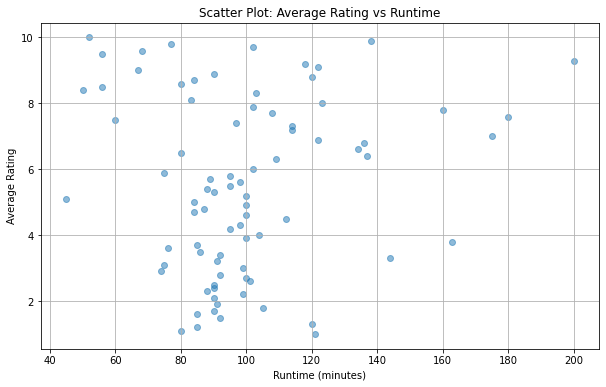

In [64]:
# Assuming 'conn' is your SQLite connection
joined_tables_runtime_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating 
ORDER BY runtime_minutes DESC
;
""", conn)

# Created a scatter plot comparing the average rating and the runtime in minutes
plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_runtime_df['runtime_minutes'], joined_tables_runtime_df['averagerating'], alpha=0.5)
plt.title('Scatter Plot: Average Rating vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [65]:

# calculating the correlation between runtime and average rating
correlation = joined_tables_runtime_df['runtime_minutes'].corr(joined_tables_runtime_df['averagerating'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.08901318429856621


A potential trend of shorter length films having higher ratings emerged

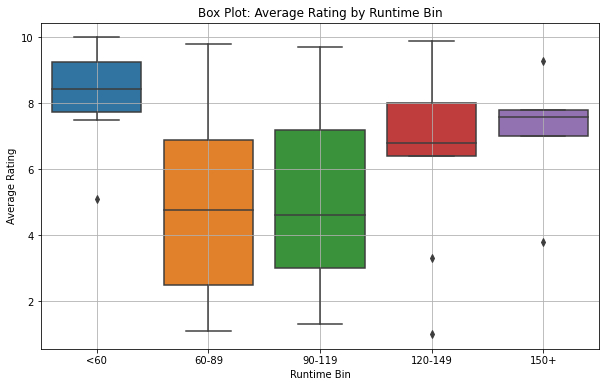

In [66]:
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)

 

# Created a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=joined_tables_runtime_df, x='runtime_bin', y='averagerating')
plt.title('Box Plot: Average Rating by Runtime Bin')
plt.xlabel('Runtime Bin')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We noticed that by their categories that either a movie of less than 60 minutes or one of greater than 120 minutes would beideal but the sample size for those movies were small and when the data was inputed into a scatter plot no real relationship was found that might stand true for all movies but how about for a specific genre. Due to us previously recommending the documentary genre lets see if a documentaries runtime would afect its rating. 

In [67]:
#joining the tables and specifying that average rating should be greater than or equal to 8
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8 AND numvotes>100
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [68]:
joined_tables_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt9343826,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",9.6,808
1,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
2,tt8866064,10 Days Before the Wedding,10 Days Before the Wedding,2018,120.0,"Comedy,Drama,Musical",9.5,354
3,tt3746274,Mama's Heart. Gongadze,Mama's Heart. Gongadze,2017,100.0,"Biography,Crime,Documentary",9.4,500
4,tt5858514,The Children of Genghis,Chingisiin huuhduud,2017,101.0,"Adventure,Family",9.4,797
...,...,...,...,...,...,...,...,...
203,tt5084198,Kizumonogatari Part 3: Reiketsu,Kizumonogatari III: Reiketsu hen,2017,83.0,"Action,Animation,Drama",8.0,957
204,tt8202076,Super Hero,Super Hero,2018,NaN,"Action,Adventure,Thriller",8.0,276
205,tt1821682,Traffic,Traffic,2011,122.0,"Action,Adventure,Mystery",8.0,3551
206,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780


In [69]:
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") 

In [70]:
# used explode fucntion to seperate movies based on genres

In [71]:
genres_split_df # the seperation was loaded into this dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama,9.5,6509
0,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,History,9.5,6509
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Crime,9.3,18470
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Mystery,9.3,18470
1,tt5354160,Aynabaji,Aynabaji,2016,147.0,Thriller,9.3,18470
...,...,...,...,...,...,...,...,...
142,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193
142,tt1663202,The Revenant,The Revenant,2015,156.0,Biography,8.0,621193
143,tt2375379,One Piece Film Z,One Piece Film Z,2012,108.0,Action,8.0,4967
143,tt2375379,One Piece Film Z,One Piece Film Z,2012,108.0,Adventure,8.0,4967


In [72]:
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts

Drama          71
Documentary    37
Comedy         32
Action         28
Biography      25
Thriller       24
Crime          20
Adventure      19
History        16
Romance        14
Mystery        13
Animation      12
Family         10
Fantasy        10
Sport           9
Music           8
Sci-Fi          8
War             8
Horror          5
Musical         4
News            4
Western         1
Name: genres, dtype: int64

In [73]:
joined_tables_df = pd.read_sql("""
    SELECT mb.genres, mr.averagerating, mb.runtime_minutes
    FROM movie_basics mb
    JOIN movie_ratings mr USING(movie_id)
    WHERE mr.averagerating >= 8 AND numvotes>1000
    AND runtime_minutes IS NOT null
    AND mb.genres = 'Documentary'
""", conn)

# Display the resulting DataFrame
joined_tables_df

,genres,averagerating,runtime_minutes
0,Documentary,8.9,121.0
1,Documentary,8.0,81.0
2,Documentary,8.2,161.0
3,Documentary,8.1,75.0
4,Documentary,8.0,88.0
5,Documentary,8.1,90.0
6,Documentary,8.0,70.0
7,Documentary,8.0,106.0
8,Documentary,8.0,106.0
9,Documentary,8.1,89.0


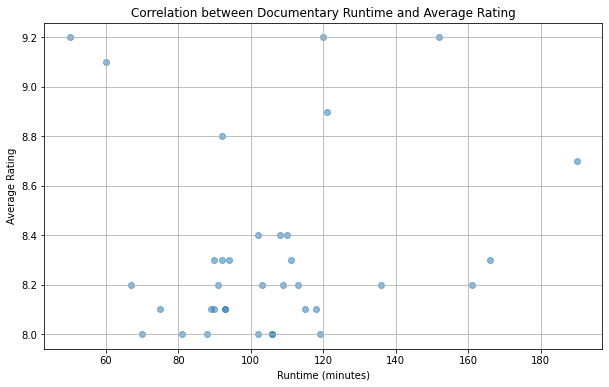

In [74]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_df['runtime_minutes'], joined_tables_df['averagerating'], alpha=0.5)
plt.title('Correlation between Documentary Runtime and Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [75]:
correlation_coefficient = joined_tables_df['runtime_minutes'].corr(joined_tables_df['averagerating'])
correlation_coefficient

0.09180660818511564

The appearance of a correlation between shorter films & ratings could have been the result of a smaller amount of films in those categories

# Recommendation 
 We recommend the studio not invest additional resources into considering film length when developing movies, as we have not found any measurable correlation between how well a movie is rated and it’s length.

# Directors

We are joining three tables ( persons, directors,movie ratings) Using movie_id to join directors and movie ratings and person_id to combine that new table to the persons table. We also filtered using the numvotes column, only keeping movies that have more than 1000 votes.

In [76]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
WHERE numvotes > 1000 -- normalizing he data making sure that they have at least 100 votes
;
"""
pd.read_sql(q, conn)
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
1,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
2,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
3,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
...,...,...,...,...,...,...,...,...,...
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None
26623,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"
26624,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"
26625,tt9558612,3.7,4057,nm1293225,nm1293225,Omung Kumar,NaN,NaN,"art_department,art_director,production_designer"


# Data Cleaning
For this section it seems we have lots of duplicates and would require some data cleaning.

In [77]:
df_duplicates = df_directors.drop_duplicates() #dropping the duplicates
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
6,tt1171222,5.1,8296,nm0847859,nm0847859,David E. Talbert,1966.0,NaN,"writer,director,producer"
7,tt1174693,5.8,2381,nm0153774,nm0153774,Jacob Chase,1986.0,NaN,"editor,director,actor"
8,tt1181840,7.0,5494,nm0540962,nm0540962,Mathias Malzieu,1974.0,NaN,"actor,writer,director"
...,...,...,...,...,...,...,...,...,...
26617,tt8564902,4.7,5863,nm1625338,nm1625338,Dinesh D'Souza,1961.0,NaN,"writer,director,producer"
26619,tt8564902,4.7,5863,nm6583447,nm6583447,Bruce Schooley,NaN,NaN,"writer,director,producer"
26621,tt8574252,7.1,1526,nm4219902,nm4219902,Hoon-jung Park,NaN,NaN,"writer,director"
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None


Here we dropped values that were not listed as NaN in the death_year column. This was because directors that had a value listed in this column were seen as dead and ones without a value were still alive.

In [78]:
df_duplicates = df_duplicates[df_duplicates['death_year'].isnull()]
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
4,tt1094666,7.0,1613,nm1464150,nm1464150,Oren Kaplan,1979.0,NaN,"director,editorial_department,camera_department"
6,tt1171222,5.1,8296,nm0847859,nm0847859,David E. Talbert,1966.0,NaN,"writer,director,producer"
7,tt1174693,5.8,2381,nm0153774,nm0153774,Jacob Chase,1986.0,NaN,"editor,director,actor"
8,tt1181840,7.0,5494,nm0540962,nm0540962,Mathias Malzieu,1974.0,NaN,"actor,writer,director"
...,...,...,...,...,...,...,...,...,...
26617,tt8564902,4.7,5863,nm1625338,nm1625338,Dinesh D'Souza,1961.0,NaN,"writer,director,producer"
26619,tt8564902,4.7,5863,nm6583447,nm6583447,Bruce Schooley,NaN,NaN,"writer,director,producer"
26621,tt8574252,7.1,1526,nm4219902,nm4219902,Hoon-jung Park,NaN,NaN,"writer,director"
26622,tt8948790,9.0,1778,nm9450602,nm9450602,Gowtam Tinnanuri,NaN,NaN,None


Here we are dropping irrelevant columns that distracted from the finial story we were telling. These columns included ['death_year','birth_year', 'person_id'].



In [79]:
df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)

C:\Users\rompalme\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Here we are printing out our final data table after all the proper cleaning had been done.

In [80]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt1043726,4.2,50352,Renny Harlin
4,tt1094666,7.0,1613,Oren Kaplan
6,tt1171222,5.1,8296,David E. Talbert
7,tt1174693,5.8,2381,Jacob Chase
8,tt1181840,7.0,5494,Mathias Malzieu
...,...,...,...,...
26617,tt8564902,4.7,5863,Dinesh D'Souza
26619,tt8564902,4.7,5863,Bruce Schooley
26621,tt8574252,7.1,1526,Hoon-jung Park
26622,tt8948790,9.0,1778,Gowtam Tinnanuri


In [81]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 26623
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       10684 non-null  object 
 1   averagerating  10684 non-null  float64
 2   numvotes       10684 non-null  int64  
 3   primary_name   10684 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 417.3+ KB


Here we are removing rows of data that are missing information also known as the null values.

In [82]:
df = df_duplicates.dropna() #droppping the null values
df_duplicates.isna().sum()

movie_id         0
averagerating    0
numvotes         0
primary_name     0
dtype: int64

Here we listed out the top 10 directors with the most movies produced that also had over 1000 votes towards their movie ratings.

In [83]:
df_duplicates.value_counts("primary_name").head(10)

primary_name
Alex Gibney             15
Tyler Perry             13
Sarik Andreasyan        11
Uwe Boll                11
Takashi Miike           10
Steven C. Miller         9
Anurag Kashyap           9
Michael Winterbottom     8
Adam Wingard             8
Sang-soo Hong            8
dtype: int64

Here we are calculating the average rating for the top 10 directors based on the number of movies they directed after the data has been normalized using the filter of 1000 votes towards a movie rating.

In [84]:
# Step 1
grouped_data = df_duplicates.groupby('primary_name').agg({'averagerating': 'mean', 'movie_id': 'size'})

 

# Step 2
grouped_data.rename(columns={'averagerating': 'mean_averagerating', 'movie_id': 'movie_count'}, inplace=True)

 

# Step 3
top_10_names = grouped_data.sort_values(by='movie_count', ascending=False).head(10)

 

# Step 4
mean_averagerating_top_10 = top_10_names['mean_averagerating'].mean()

 

# Print the top 10 names, their mean averagerating, and the mean of averagerating for the top 10 names
#print(top_10_names)
print("\nMean Averagerating for Top 10 Names:", mean_averagerating_top_10)

df2= top_10_names.sort_values('mean_averagerating',ascending=False)
print(df2.head(10))


Mean Averagerating for Top 10 Names: 5.709602175602176
                      mean_averagerating  movie_count
primary_name                                         
Alex Gibney                     7.306667           15
Anurag Kashyap                  7.144444            9
Sang-soo Hong                   6.787500            8
Takashi Miike                   6.400000           10
Michael Winterbottom            6.237500            8
Sarik Andreasyan                5.236364           11
Tyler Perry                     4.930769           13
Steven C. Miller                4.677778            9
Keoni Waxman                    4.375000            8
Uwe Boll                        4.000000           11


Here we have created a visualization to represent the top 10 directors based the mean rating each director recieved for all the movies they created

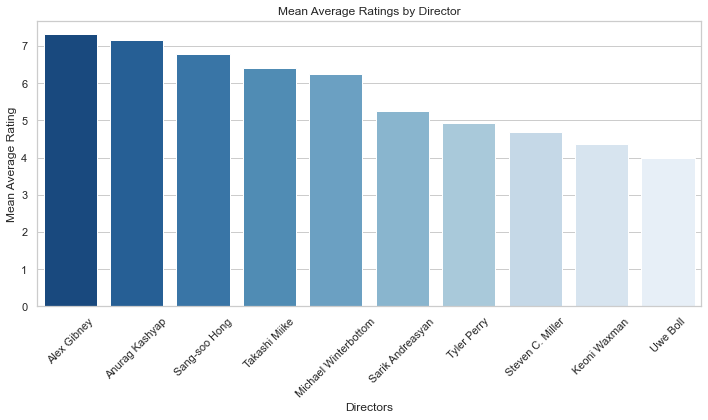

In [85]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x=df2.index, y='mean_averagerating', data=df2, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Mean Average Rating")
plt.title("Mean Average Ratings by Director")
plt.tight_layout()


# Show the plot

 

plt.show()

# Recommendation
These are the directors we recommend because they had the most experience with the highest ratings. Alex Gibney, Anurag Kashyap, and Sang-soo Hong.

# Summary
For our client we would recommend starting and investing heavily into the making Documentaries of any length of runtime as that metric does not seem to affect ratings with the recommended directors as some of them do have some experience in making Documentaries. 